<a href="https://colab.research.google.com/github/HiteshMalla1343/DataAnalysisPro/blob/main/Nifty_50_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [2]:
df = pd.read_csv("/content/^NSEI.csv")


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [4]:
print("Shape of data:",df.shape)

Shape of data: (3969, 7)


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3939.000000,3939.000000,3939.000000,3939.000000,3939.000000,3.939000e+03
mean,9146.922177,9198.259125,9080.527969,9140.777308,9140.777308,1.978570e+05
std,4423.896291,4433.513754,4405.357291,4420.576019,4420.576019,2.122937e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5492.375000,5534.074951,5444.500000,5487.050049,5487.050049,0.000000e+00
50%,8176.649902,8218.500000,8126.500000,8173.899902,8173.899902,1.677000e+05
75%,11352.324707,11387.149903,11264.600097,11321.024903,11321.024903,2.729000e+05
max,20156.449219,20222.449219,20129.699219,20192.349609,20192.349609,1.811000e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3969 non-null   object 
 1   Open       3939 non-null   float64
 2   High       3939 non-null   float64
 3   Low        3939 non-null   float64
 4   Close      3939 non-null   float64
 5   Adj Close  3939 non-null   float64
 6   Volume     3939 non-null   float64
dtypes: float64(6), object(1)
memory usage: 217.2+ KB


In [7]:
df.isnull().sum()

Date          0
Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


In [11]:
df.drop(columns=["Adj Close","Volume"],inplace=True)

In [12]:
df1=df.copy()

In [13]:
df.drop(columns=["High","Low"],inplace=True)

In [14]:
df.head()

,Date,Open,Close
0,2007-09-17,4518.450195,4494.649902
1,2007-09-18,4494.100098,4546.200195
2,2007-09-19,4550.250000,4732.350098
3,2007-09-20,4734.850098,4747.549805
4,2007-09-21,4752.950195,4837.549805


In [15]:
df.set_index('Date',drop=True,inplace=True)
df.head(10)

,Open,Close
Date,,
2007-09-17,4518.450195,4494.649902
2007-09-18,4494.100098,4546.200195
2007-09-19,4550.250000,4732.350098
2007-09-20,4734.850098,4747.549805
2007-09-21,4752.950195,4837.549805
2007-09-24,4837.149902,4932.200195
2007-09-25,4939.100098,4938.850098
2007-09-26,4937.600098,4940.500000
2007-09-27,4942.700195,5000.549805


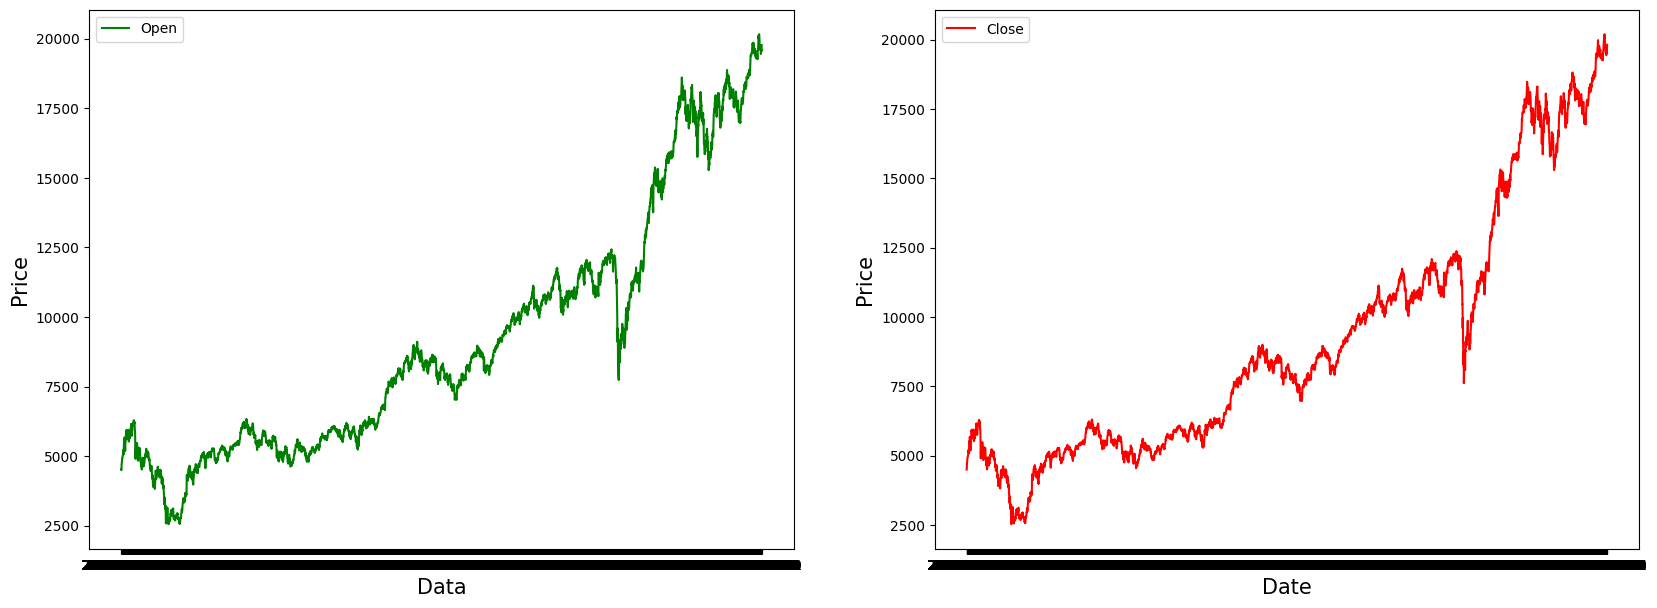

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].plot(df['Open'], label = 'Open', color = 'green')
ax[0].set_xlabel('Data', size=15)
ax[0].set_ylabel('Price', size=15)
ax[0].legend()
ax[1].plot(df['Close'], label='Close', color='red')
ax[1].set_xlabel('Date', size=15)
ax[1].set_ylabel('Price', size=15)
ax[1].legend()
fig.show()

In [17]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,Close
Date,,
2007-09-17,0.111621,0.111526
2007-09-18,0.110238,0.114443
2007-09-19,0.113428,0.124979
2007-09-20,0.123915,0.125839
2007-09-21,0.124943,0.130933
2007-09-24,0.129726,0.136290
2007-09-25,0.135518,0.136667
2007-09-26,0.135433,0.136760
2007-09-27,0.135722,0.140159


In [18]:
training_size = round(len(df) * 0.9)
training_size

3545

In [19]:
train_data = df[:training_size]
test_data = df[training_size:]
train_data.shape, test_data.shape

((3545, 2), (394, 2))

In [20]:
def create_sequence(dataset):
 sequences = []
 labels = []

 start_idx = 0
 for stop_idx in range(7,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx +=1
 return (np.array(sequences), np.array(labels))

In [21]:
train_seq, train_label, = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((3538, 7, 2), (3538, 2), (387, 7, 2), (387, 2))

In [22]:

model = Sequential()

model.add(LSTM(units=50, return_sequences = True,  input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss = 'mean_squared_error', optimizer = 'adam',  metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             10600     
                                                                 
 dropout (Dropout)           (None, 7, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
111/111 [==============================] - 6s 14ms/step - loss: 0.0080 - mean_absolute_error: 0.0462 - val_loss: 3.0830e-04 - val_mean_absolute_error: 0.0134
Epoch 2/100
111/111 [==============================] - 1s 7ms/step - loss: 4.2816e-04 - mean_absolute_error: 0.0147 - val_loss: 2.8524e-04 - val_mean_absolute_error: 0.0135
Epoch 3/100
111/111 [==============================] - 1s 7ms/step - loss: 3.8851e-04 - mean_absolute_error: 0.0138 - val_loss: 2.7384e-04 - val_mean_absolute_error: 0.0128
Epoch 4/100
111/111 [==============================] - 1s 7ms/step - loss: 3.6197e-04 - mean_absolute_error: 0.0134 - val_loss: 7.5729e-04 - val_mean_absolute_error: 0.0245
Epoch 5/100
111/111 [==============================] - 1s 9ms/step - loss: 3.1038e-04 - mean_absolute_error: 0.0125 - val_loss: 3.9623e-04 - val_mean_absolute_error: 0.0168
Epoch 6/100
111/111 [==============================] - 1s 9ms/step - loss: 2.5569e-04 - mean_absolute_error: 0.0114 - val_loss: 3.8702e-04

In [24]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

13/13 [==============================] - 1s 3ms/step


array([[0.8324026 , 0.83366275],
       [0.83558166, 0.83689064],
       [0.83782876, 0.83921033],
       [0.8358369 , 0.8373298 ],
       [0.83498406, 0.8365241 ]], dtype=float32)

In [25]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[17206.258, 17253.479],
       [17262.219, 17310.51 ],
       [17301.773, 17351.494],
       [17266.71 , 17318.27 ],
       [17251.7  , 17304.033]], dtype=float32)

Visualisation

In [27]:
df_merge = pd.concat([df.iloc[-387:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=df.iloc[-387:].index)], axis=1)

In [28]:
df_merge[['Open','Close']] = MMS.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2022-03-22,17120.400391,17315.500000,17206.257812,17253.478516
2022-03-23,17405.050781,17245.650391,17262.218750,17310.509766
2022-03-24,17094.949219,17222.750000,17301.773438,17351.494141
2022-03-25,17289.000000,17153.000000,17266.710938,17318.269531
2022-03-28,17181.849609,17222.000000,17251.699219,17304.033203


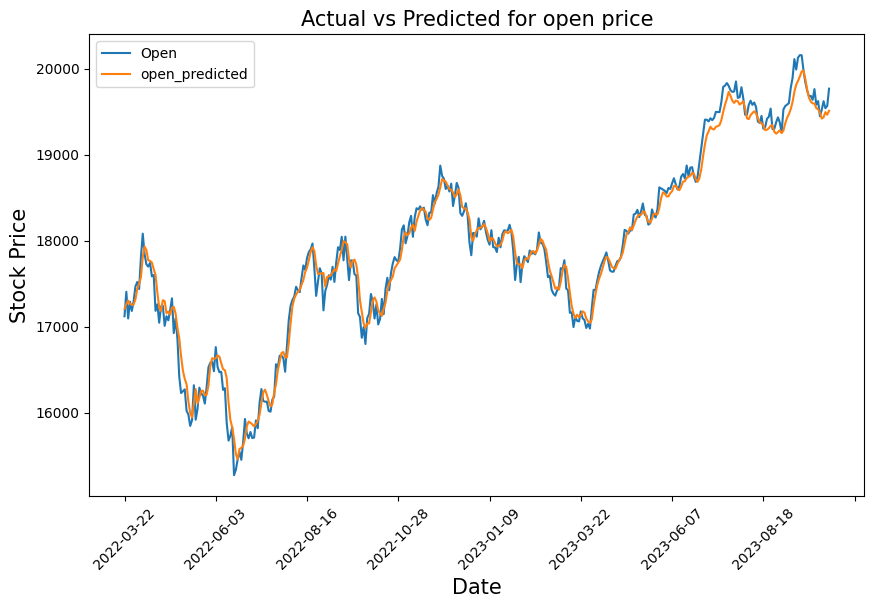

In [29]:
df_merge[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

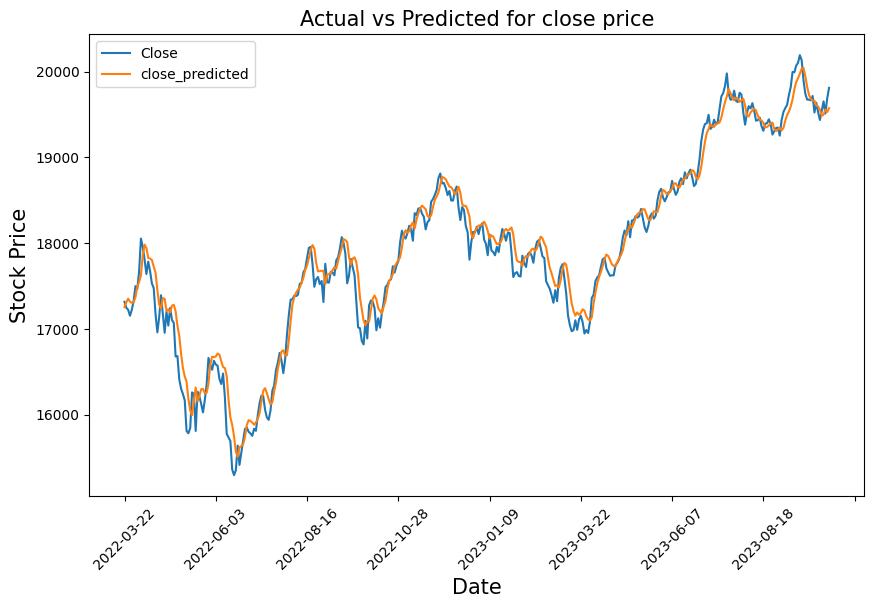

In [30]:
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [31]:
df_merge.tail(35)

,Open,Close,open_predicted,close_predicted
Date,,,,
2023-08-22,19417.099609,19396.449219,19289.298828,19353.677734
2023-08-23,19439.199219,19444.000000,19306.753906,19370.923828
2023-08-24,19535.150391,19386.699219,19335.738281,19399.761719
2023-08-25,19297.400391,19265.800781,19341.058594,19405.199219
2023-08-28,19298.349609,19306.050781,19266.423828,19331.066406
2023-08-29,19374.849609,19342.650391,19243.710938,19307.968750
2023-08-30,19433.449219,19347.449219,19261.015625,19325.056641
2023-08-31,19375.550781,19253.800781,19282.644531,19346.593750
2023-09-01,19258.150391,19435.300781,19250.310547,19314.498047


In [32]:
df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=10, freq='D', closed='right')))

In [33]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [34]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 22ms/step


In [35]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

In [36]:
df_merge.index = pd.to_datetime(df_merge.index)

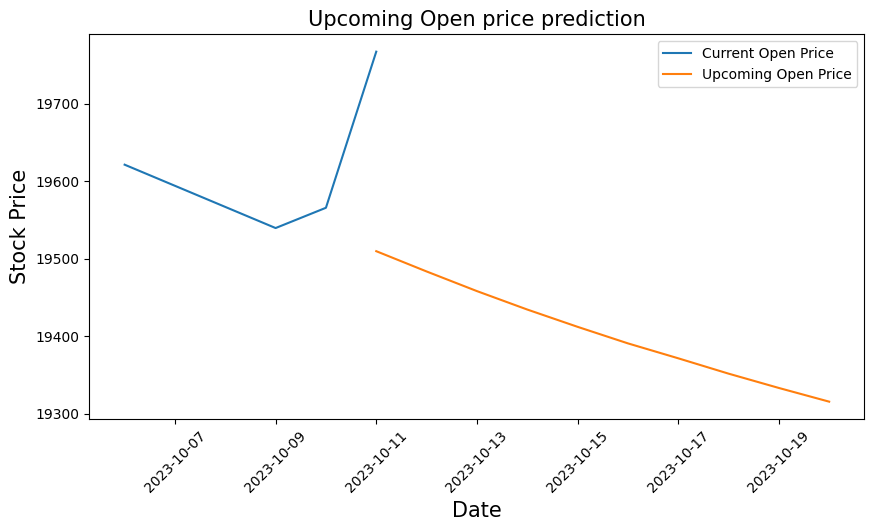

In [37]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2023-10-06':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2023-10-06':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

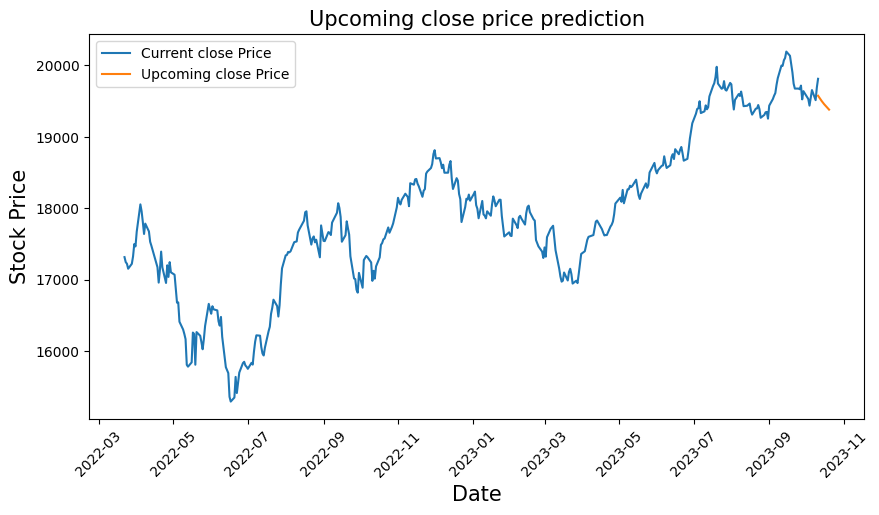

In [38]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

In [39]:
df_merge.tail(30)

,Open,Close,open_predicted,close_predicted
2023-09-11,19890.000000,19996.349609,19611.855469,19676.490234
2023-09-12,20110.150391,19993.199219,19729.351562,19794.363281
2023-09-13,19989.500000,20070.000000,19812.599609,19878.275391
2023-09-14,20127.949219,20103.099609,19857.744141,19923.947266
2023-09-15,20156.449219,20192.349609,19907.958984,19974.458984
2023-09-18,20155.949219,20133.300781,19967.048828,20033.912109
2023-09-20,19980.750000,19901.400391,19977.740234,20045.109375
2023-09-21,19840.550781,19742.349609,19879.218750,19947.103516
2023-09-22,19744.849609,19674.250000,19756.044922,19823.826172
2023-09-25,19678.199219,19674.550781,19662.013672,19729.400391


In [40]:
df_merge.loc["2023-10-11"]["Open"]-df_merge.loc["2023-10-11"]["open_predicted"]

257.400390625

In [41]:
df_merge.loc["2023-10-11"]

Open               19767.000000
Close              19811.349609
open_predicted     19509.599609
close_predicted    19574.355469
Name: 2023-10-11 00:00:00, dtype: float64

In [42]:
upcoming_prediction.tail(10)

,Open,Close
2023-10-11,19509.599795,19574.353556
2023-10-12,19483.442950,19548.756815
2023-10-13,19458.117081,19523.400183
2023-10-14,19434.335652,19499.669542
2023-10-15,19412.029414,19477.324786
2023-10-16,19390.682155,19455.816194
2023-10-17,19371.427025,19436.488580
2023-10-18,19351.628402,19416.522786
2023-10-19,19333.143393,19397.928132
2023-10-20,19315.466276,19380.141209


19740.843340625 this is the prediction for 12th october which is pretty close to real-time data(19823)